# NN Assignment 1

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

# Task 13
# Use object oriented programming and/or the Matrix Notation to build and train the network
# 2 classes were created as part of the Object Oriented Programming, the NeuronLayer class representing neurons and the NueralNetwork class representing the whole Nueral Network


class NeuronLayer:
    def __init__(self, input_size, output_size):
        self.input_size = input_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights = np.random.randn(input_size, output_size)
        self.biases = np.zeros((1, output_size))
        self.input = None
        self.output = None

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_pass(self, X):
        # Forward pass
        self.input = X
        self.output = self.sigmoid(np.dot(X, self.weights) + self.biases)

    def backward_pass(self, error, learning_rate):
        # Backward pass (compute gradients)
        delta = error * self.sigmoid_derivative(self.output)

        # Update weights using gradient descent
        self.weights += self.input.T.dot(delta) * learning_rate

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Create neuron layers
        self.hidden_layer = NeuronLayer(input_size, hidden_size)
        self.output_layer = NeuronLayer(hidden_size, output_size)

    # Task 8
    # Error Aggrigation
    # Calculate the aggrigated error
    def error_Nuweiba(self, actual_outputs, target_outputs):
        # Calculate error vector
        error_vector = actual_outputs - target_outputs

        # Calculate aggregated error
        aggregated_error = np.mean(np.abs(error_vector))

        return error_vector, aggregated_error

    def forward_pass(self, X):
        # Forward pass
        self.hidden_layer.forward_pass(X)
        self.output_layer.forward_pass(self.hidden_layer.output)

    def compute_loss(self, y):
        # Compute the loss
        return np.mean(0.5 * (y - self.output_layer.output) ** 2)

    # Task 6
    # Implement the backpropagation algorithm to train the network. The function apply one training epoch only.
    def backward_pass(self, X, y, learning_rate):
        # Backward pass (compute gradients)
        output_error = y - self.output_layer.output

        # Backpropagation through layers
        self.output_layer.backward_pass(output_error, learning_rate)
        self.hidden_layer.backward_pass(output_error.dot(self.output_layer.weights.T), learning_rate)

    def validate(self, X_val, y_val):
        # Make predictions on the validation set
        self.forward_pass(X_val)
        predictions = (self.output_layer.output > 0.5).astype(int)

        # Calculate validation accuracy
        accuracy = np.mean(predictions == y_val)
        return accuracy

    def calculate_map(self, predictions, ground_truth):
      # Calculate mean average precision
        mAP = average_precision_score(ground_truth, predictions)
        return mAP

    # Task 7
    # Impalement a function to test the network by forward passing a set of labeled data
    def test_Nuweiba(self, X_test, y_test):
        # Make predictions on the test set
        self.forward_pass(X_test)
        predictions = (self.output_layer.output > 0.5).astype(int)

        # Calculate test accuracy
        accuracy = np.mean(predictions == y_test)
        print(f"Test Accuracy: {accuracy}")

        # Confusion Matrix
        conf_matrix = confusion_matrix(y_test, predictions)
        print("Confusion Matrix:")
        print(conf_matrix)

        # Plot Confusion Matrix
        self.plot_confusion_matrix(conf_matrix)

        # Calculate error matrix and aggregated error
        error_vector, aggregated_error = self.error_Nuweiba(predictions, y_test)

        # Print and return error information
        print(f"Aggregated Error: {aggregated_error}")

        return error_vector, aggregated_error

    def train_Nuweiba(self, X, y, X_val, y_val, epochs, learning_rate, batch_size=100):
        num_samples = X.shape[0]
        training_loss_history = []
        validation_accuracy_history = []
        map_history = []
        aggregated_error_history = []

        # Initialize the final weights matrix
        final_weights_matrix = None

        for epoch in range(epochs):
            # Shuffle the data before each epoch
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, num_samples, batch_size):
                # Get the current batch
                X_batch = X_shuffled[i:i+batch_size]
                y_batch = y_shuffled[i:i+batch_size]

                # Forward pass
                self.forward_pass(X_batch)

                # Compute the loss
                loss = self.compute_loss(y_batch)

                # Task 9
                # The backpropagation pass should be executed after each iteration (one batch).
                # Backward pass
                self.backward_pass(X_batch, y_batch, learning_rate)

            # Task 10
            # The validation is performed after each epoch.
            # Validate after every epoch
            validation_accuracy = self.validate(X_val, y_val)
            validation_accuracy_history.append(validation_accuracy)

            # Calculate and save mAP for demonstration purposes
            predictions = self.output_layer.output
            ground_truth = y_val
            map_value = self.calculate_map(predictions, ground_truth)
            map_history.append(map_value)

            # Calculate and save aggregated error
            error_vector, aggregated_error = self.error_Nuweiba(predictions, ground_truth)
            aggregated_error_history.append(aggregated_error)

            # Print the loss, validation accuracy, and mAP after every epoch
            print(f"Epoch {epoch + 1}, Loss: {loss}, Validation Accuracy: {validation_accuracy}, mAP: {map_value}, Aggregated Error: {aggregated_error}")

            # Save training loss for plotting
            training_loss_history.append(loss)

            # Save the weights matrix for the final epoch
            final_weights_matrix = self.output_layer.weights.copy()

        # Plotting
        self.plot_stats(training_loss_history, validation_accuracy_history, map_history, aggregated_error_history)

        # Return the final weights matrix
        return final_weights_matrix

    # Task 12
    # Report the training, validation and testing accuracies. Use tables, graphs, and charts as possible
    # Plotting functions
    def plot_confusion_matrix(self, conf_matrix):
        plt.figure(figsize=(6, 6))
        plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title('Confusion Matrix')
        plt.colorbar()

        classes = ['Class 0', 'Class 1']  # Adjust classes based on your actual classes
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.show()

    def plot_stats(self, training_loss_history, validation_accuracy_history, map_history, aggregated_error_history):
        # Plot training loss, validation accuracy, mAP, and aggregated error
        plt.figure(figsize=(18, 5))

        # Plot training loss
        plt.subplot(1, 4, 1)
        plt.plot(training_loss_history, label='Training Loss')
        plt.title('Training Loss Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        # Plot validation accuracy
        plt.subplot(1, 4, 2)
        plt.plot(validation_accuracy_history, label='Validation Accuracy', color='orange')
        plt.title('Validation Accuracy Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot mAP
        plt.subplot(1, 4, 3)
        plt.plot(map_history, label='mAP', color='green')
        plt.title('mAP Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('mAP')
        plt.legend()

        # Plot aggregated error
        plt.subplot(1, 4, 4)
        plt.plot(aggregated_error_history, label='Aggregated Error', color='red')
        plt.title('Aggregated Error Over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Aggregated Error')
        plt.legend()

        plt.tight_layout()
        plt.show()

/tmp/ipykernel_5000/323786105.py:16: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv(url2, names=column_names2)
/tmp/ipykernel_5000/323786105.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv(url3, names=column_names3)


Epoch 1, Loss: 0.09712180974981721, Validation Accuracy: 0.7028985507246377, mAP: 0.8359402703748854, Aggregated Error: 0.43190701883919147
Epoch 2, Loss: 0.06087794584852931, Validation Accuracy: 0.9021739130434783, mAP: 0.9588032588921711, Aggregated Error: 0.346333316690583
Epoch 3, Loss: 0.05541186125716361, Validation Accuracy: 0.9166666666666666, mAP: 0.9756870236955163, Aggregated Error: 0.2950204401083583
Epoch 4, Loss: 0.04649784196569, Validation Accuracy: 0.9239130434782609, mAP: 0.9849627316728662, Aggregated Error: 0.25935117423259124
Epoch 5, Loss: 0.027782235485854574, Validation Accuracy: 0.9384057971014492, mAP: 0.9898135755729591, Aggregated Error: 0.23097558021596065
Epoch 6, Loss: 0.028327071006032024, Validation Accuracy: 0.9492753623188406, mAP: 0.9931470689847799, Aggregated Error: 0.20825211744797084
Epoch 7, Loss: 0.02490657184065994, Validation Accuracy: 0.9601449275362319, mAP: 0.9941095080930891, Aggregated Error: 0.18948771714681567
Epoch 8, Loss: 0.0244255

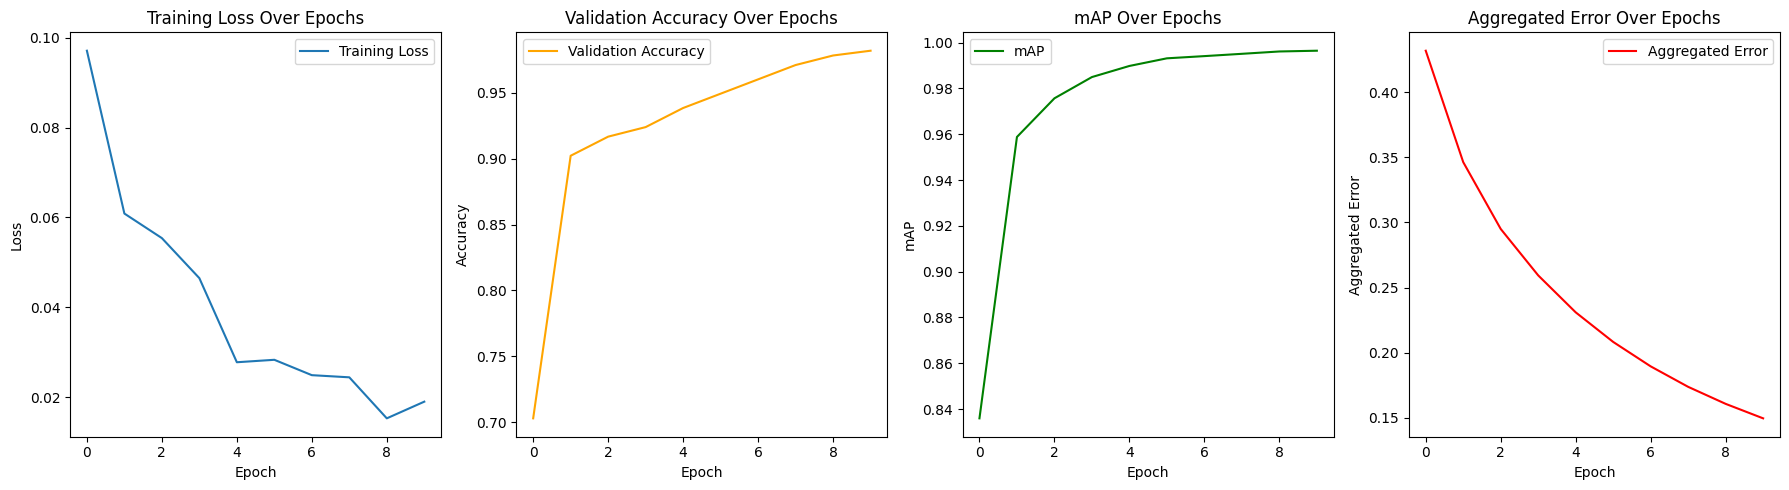

[[-0.56741843]
 [ 0.03351016]
 [-1.09205037]
 [-1.76741119]
 [ 1.36740509]
 [ 1.10980874]
 [ 0.45022166]
 [ 0.23878671]
 [-0.35121334]
 [-0.24652061]]
Test Accuracy: 0.9632352941176471
Confusion Matrix:
[[64  2]
 [ 3 67]]


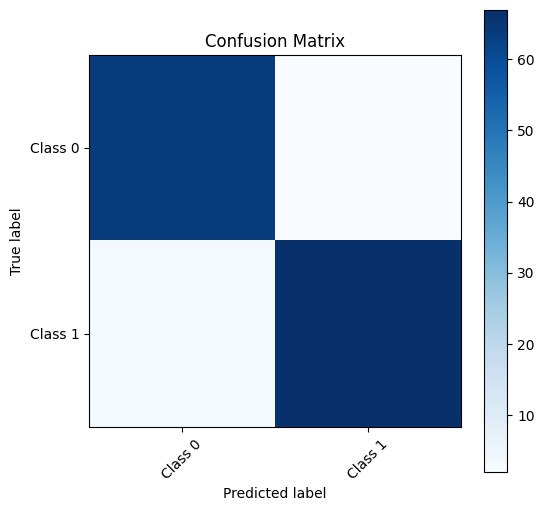

Aggregated Error: 0.03676470588235294


In [3]:
# Task 2
# Use Banknote authentication dataset
# Importing dataset and creating Features and Labels for training and testing the Nueral Network

# Load the dataset and preprocess
# Load the dataset and preprocess
url1 = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
url2 = "/workspaces/Neural-Network-Model/smoking.csv"
url3 = "/workspaces/Neural-Network-Model/heart_disease_health_indicators_BRFSS2015.csv"

column_names1 = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]
column_names2 = ["ID","gender","age","height(cm)","weight(kg)","waist(cm)","eyesight(left)","eyesight(right)","hearing(left)","hearing(right)","systolic","relaxation","fasting blood sugar","Cholesterol","triglyceride","HDL","LDL","hemoglobin","Urine protein","serum creatinine","AST","ALT","Gtp","oral","dental caries","tartar","smoking"]
column_names3 = ["HeartDiseaseorAttack","HighBP","HighChol","CholCheck","BMI","Smoker","Stroke","Diabetes","PhysActivity","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","GenHlth","MentHlth","PhysHlth","DiffWalk","Sex","Age","Education","Income"]

df1 = pd.read_csv(url1, names=column_names1)
df2 = pd.read_csv(url2, names=column_names2)
df3 = pd.read_csv(url3, names=column_names3)

X = df1.drop("Class", axis=1).values
y = df1["Class"].values.reshape(-1, 1)

# Second Dataset
#X = df3.drop(["HeartDiseaseorAttack","HighBP","HighChol","CholCheck","BMI","Fruits","Veggies","HvyAlcoholConsump","AnyHealthcare","NoDocbcCost","GenHlth","MentHlth","PhysHlth","DiffWalk","Sex","Age","Education","Income"], axis=1).values
#y = df3["HeartDiseaseorAttack"].values.reshape(-1, 1)

#X = X[1:].astype(float).astype(int)
#y = y[1:].astype(float).astype(int)

#-----------------------------------------------------------------------------------------------------------------------------------------------#

# Task 3
# Split the data randomly into [T, V, S]. T = 70% for training, V = 20% for validation, and S = 10% for testing
# Spliting Data first 70% Training and 30% rest, then the 30% is divided 2/3 for Validation and 1/3 for Testing

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#-----------------------------------------------------------------------------------------------------------------------------------------------#

# Task 1
# Build a network as [4,10,1]. Input layer: 4 neurons, one hidden layer of 10 neurons and one output layer with 1 neuron
# Initialize the architecture values as mentioned

# Network Architecture [4, 10, 1]
input_size = 4
hidden_size = 10
output_size = 1

# Hyperparameters
learning_rate = 0.01
epochs = 10

# Create an instance of the NeuralNetwork class
neural_network = NeuralNetwork(input_size, hidden_size, output_size)

# Task 5
# Train the network at least 10 epochs
# Train the neural network with batch training and validate after each epoch
Weights_Matrix = neural_network.train_Nuweiba(X_train_scaled, y_train, X_val_scaled, y_val, epochs, learning_rate, batch_size=100)

print(Weights_Matrix)

#-----------------------------------------------------------------------------------------------------------------------------------------------#
# task 11
# The testing is performed only once after the completion of the training
# Testing the NeuralNetwork using the features and labels dedicated for testing (10% of the dataset)

# Test the neural network on the test set
Error_Vector, Error = neural_network.test_Nuweiba(X_test_scaled, y_test)